In [ ]:
# using the wine-labeled data set
# cluster the vectors

Assignment: Use the wine data file wine-labeled.csv here.
 - (a) Read the file with pandas.
 - (b) Drop the red/white and quality columns to produce an unlabeled data set (so that you don't know whether any given wine's quality or cover).
- (c) Using sklearn.preprocessing.MinMaxScaler scale all the data
- (d) Convert the data into its first three principal components.
- (e) Plot the data onto its first two principal component planes and plot. Do there appear to be a natural clusters? (Use your eyeballs.)
- (f) Use KMeans and the silhouette score, what are the optimal numbers of clusters?
- (g) Plot the clusters in the first principal plane in difierent colors, e.g., red, blue, green, etc.
- (h) What do the clusters correspond to?

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
ls *.csv

 Volume in drive C is Local Disk
 Volume Serial Number is 9CA7-0D6F

 Directory of C:\Users\pkapo\Documents\DataCamp_2020\Lecture_Python\Asssignments_PythonShapiro\Wine_080520

07/29/2020  10:46 AM           457,698 wine-labeled.csv
               1 File(s)        457,698 bytes
               0 Dir(s)  328,648,912,896 bytes free


## Read .csv file

In [3]:
df=pd.read_csv("wine-labeled.csv")

### Exploratory Data Analysis (EDA)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [6]:
features = df.columns.to_list()[:12]
X = df[features]

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


## Scale Data with MinMaxScaler

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_drop)

In [27]:
np.round(X_scaled[:5, ], 2)

array([[0.3 , 0.41, 0.  , 0.02, 0.11, 0.03, 0.06, 0.21, 0.61, 0.19, 0.2 ,
        0.33],
       [0.33, 0.53, 0.  , 0.03, 0.15, 0.08, 0.14, 0.19, 0.37, 0.26, 0.26,
        0.33],
       [0.33, 0.45, 0.02, 0.03, 0.14, 0.05, 0.11, 0.19, 0.42, 0.24, 0.26,
        0.33],
       [0.61, 0.13, 0.34, 0.02, 0.11, 0.06, 0.12, 0.21, 0.34, 0.2 , 0.26,
        0.5 ],
       [0.3 , 0.41, 0.  , 0.02, 0.11, 0.03, 0.06, 0.21, 0.61, 0.19, 0.2 ,
        0.33]])

## Apply the PCA on the dataset and Visualize data

In [36]:
from sklearn.decomposition import PCA # Principle Compoment Analysis
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [37]:

pca_names=['PCA_{}'.format(k) for k in range(1,4)]
df_pca = pd.DataFrame(X_pca, columns=pca_names)
df_pca['type'] = df['type']
df_pca.head()

,PCA_1,PCA_2,PCA_3,type
0,-0.100585,0.422175,-0.180641,red
1,-0.117043,0.371329,-0.031691,red
2,-0.098872,0.364301,-0.039112,red
3,-0.060295,0.126343,0.331730,red
4,-0.100585,0.422175,-0.180641,red


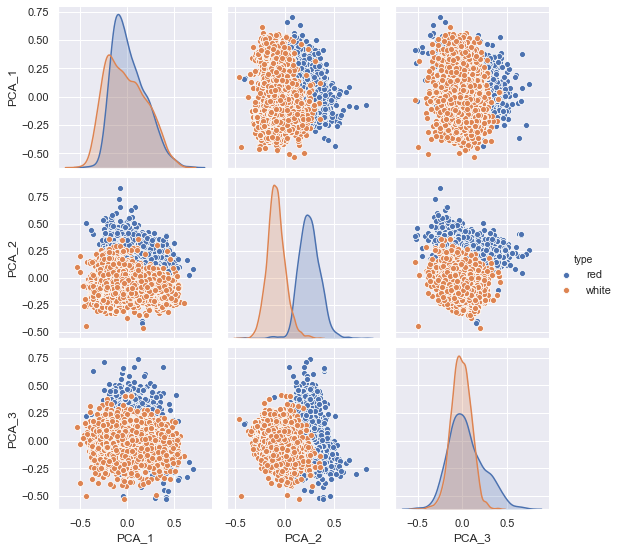

In [38]:
sns.pairplot(df_pca, hue='type')
plt.show()

## Run 10 iterations of clustering to fing th optimal Cluster size

In [39]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

max_clusters = 10
n_clusters = np.arange(2, max_clusters)
scores = []

for k in n_clusters:
    model = KMeans(n_clusters=k)
    model.fit(X_pca)
    score = silhouette_score(X_pca, model.labels_)
    scores.append(score)

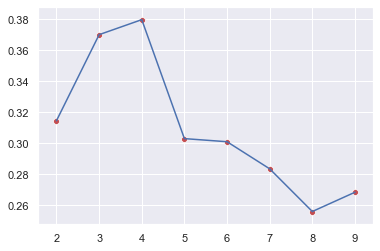

In [40]:
sns.lineplot(x=n_clusters, y=scores)
sns.scatterplot(x=n_clusters, y=scores, color='r')
plt.show()

## Visualize the Data with 'optimal' Cluster data

In [41]:
model = KMeans(n_clusters=4)
model.fit(X_pca)
labels = model.labels_

In [43]:
# .reshape() function to give a new shape tao an array without changing its data
df_pca['cluster'] = labels.reshape(-1,1)

In [44]:
df_pca['cluster']

0       2
1       2
2       2
3       3
4       2
       ..
6492    1
6493    0
6494    0
6495    1
6496    1
Name: cluster, Length: 6497, dtype: int32

In [45]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PCA_1    6497 non-null   float64
 1   PCA_2    6497 non-null   float64
 2   PCA_3    6497 non-null   float64
 3   type     6497 non-null   object 
 4   cluster  6497 non-null   int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 228.5+ KB


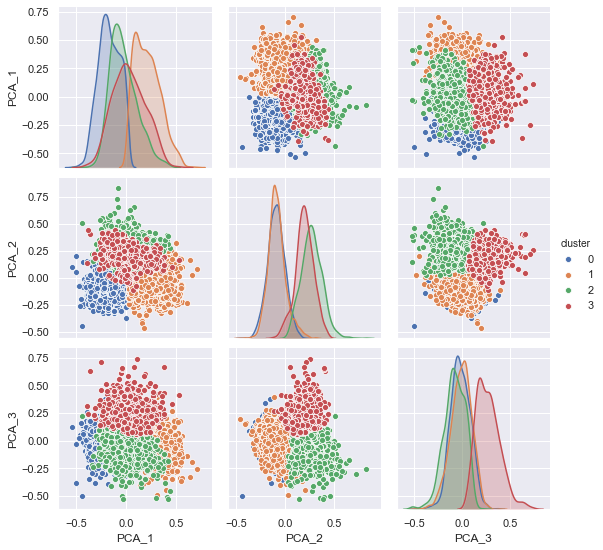

In [46]:
# plot pairwise relationships ina dataset
sns.pairplot(df_pca, hue='cluster')
plt.show()

# 2nd version with dropping type and categroy column

In [25]:
# Clustering methods
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

In [13]:
df_drop = np.array(df.drop(columns=["type","quality"]))

In [14]:
# c. Using sklearn.preprossing.MinMaxScaler scale all the data
scaler = MinMaxScaler()

input_data = scaler.fit_transform(df_drop)

In [20]:
# d. Convert the data into its first three principal components
pca = PCA(n_components=3)

pca_data = pca.fit_transform(input_data)

pca_data[:,:2]

array([[ 0.08853358,  0.39014333],
       [ 0.05542598,  0.35022475],
       [ 0.0703452 ,  0.33625361],
       ...,
       [-0.1456587 , -0.0131764 ],
       [ 0.31788425, -0.2371859 ],
       [ 0.18478845, -0.19062128]])

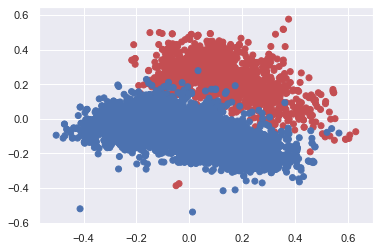

In [27]:
 # e. Plot the data onto its first two principal component planes and
# plot. Do there appear to be natural clusters?

plt.scatter(pca_data[:,0],pca_data[:,1], c=np.array(["r" if x=="red" else "b" for x in df['type']]))
plt.show()

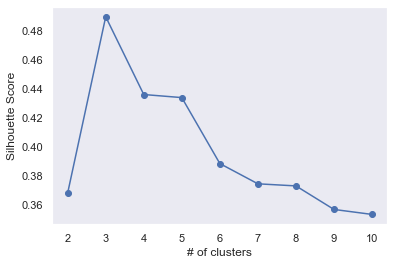

In [21]:
# f. Use KMeans and the silhouette score, what are the optimal number of clusters

sil_scores = []
clusters = []
cluster_class_data = []
for i in range(2,11):
    model = KMeans(n_clusters=i)
    model.fit(pca_data[:,:2])

    S = silhouette_score(pca_data[:,:2], model.labels_)

    if len(sil_scores) > 0 and S > max(sil_scores):
        cluster_class_data = model.predict(pca_data[:,:2])
    
    sil_scores.append(S)
    clusters.append(i)
    
plt.plot(clusters, sil_scores, marker='o')
plt.grid()
plt.xlabel("# of clusters")
plt.ylabel("Silhouette Score")
plt.show()

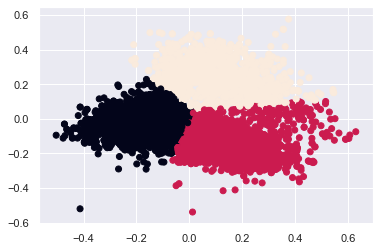

In [28]:
# g. Plot the clusters in the first principal plane in different
# colors

plt.scatter(pca_data[:,0],pca_data[:,1], c=cluster_class_data)